In [1]:
!pip install -q transformers

     |████████████████████████████████| 2.6 MB 22.4 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 3.3 MB 37.6 MB/s 
     |████████████████████████████████| 636 kB 43.2 MB/s 


# Youtube video transcript Summarizing using Transformer

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [4]:
youtube_video = "https://www.youtube.com/watch?v=uQVkcc6gKfQ"

In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'uQVkcc6gKfQ'

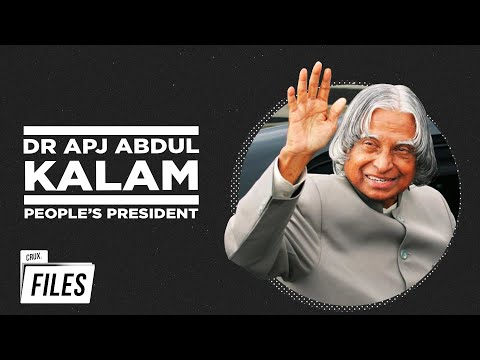

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

#Get transcrpit from video

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [9]:
transcript[0:5]

[{'duration': 3.84,
  'start': 0.0,
  'text': 'if you not do anything no problem right'},
 {'duration': 4.64, 'start': 2.56, 'text': 'you all agree'},
 {'duration': 3.999,
  'start': 3.84,
  'text': 'but if you do a mission if you do do a'},
 {'duration': 3.2, 'start': 7.2, 'text': 'great thing'},
 {'duration': 3.68,
  'start': 7.839,
  'text': 'there will be big problems but at no'}]

In [10]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9788


#Summarize the video transcript

In [11]:
summarizer = pipeline('summarization')

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[' Dr abj abdul kalam was born on october 15 1931 in rameshwaram tamil nadu as a young boy he sold newspapers to support his family . He earned a bsc in physics and went on to study aerospace engineering at the madras institute of technology . Youth is a very powerful resource so ignited mind of the youth is the most powerful resource on earth above the earth .', " In 1969 kalam transferred to isro where he led innovations in space exploration leading to india's entry into the prestigious space club 1979 . In 1979 kalam led a satellite launch vehicle to put a satellite in the orbit but the whole rocket went into bay of bengal .", " kalam was awarded the padma bhushan in 1981 . he then headed india's premier missile program where he helped develop legendary rockets like agni and prithwi earning him the nickname missal man of india . from 1992 to 97 he served as scientific advisor to the defense minister .", " In 1997 he was awarded india's highest civilian honor the bharat ratna kalam a

In [13]:
len(str(summarized_text))

3193

#Summarized results

In [14]:
str(summarized_text)

'[\' Dr abj abdul kalam was born on october 15 1931 in rameshwaram tamil nadu as a young boy he sold newspapers to support his family . He earned a bsc in physics and went on to study aerospace engineering at the madras institute of technology . Youth is a very powerful resource so ignited mind of the youth is the most powerful resource on earth above the earth .\', " In 1969 kalam transferred to isro where he led innovations in space exploration leading to india\'s entry into the prestigious space club 1979 . In 1979 kalam led a satellite launch vehicle to put a satellite in the orbit but the whole rocket went into bay of bengal .", " kalam was awarded the padma bhushan in 1981 . he then headed india\'s premier missile program where he helped develop legendary rockets like agni and prithwi earning him the nickname missal man of india . from 1992 to 97 he served as scientific advisor to the defense minister .", " In 1997 he was awarded india\'s highest civilian honor the bharat ratna k